## Scattering, absorption and extinction cross sections for a Si spherical particle - Mie theory

***
This code follows the mathematical formulation outlined in *Absorption and Scattering of Light by Small Particles* by Craig Bohren and Donald Huffman (Chapter 4) and Matlab implementation by Maetzler.

Originally written by Naresh Emani in 2016, updated by Jinal Tapar in 2020
*** 


In [2]:
# Routine imports

from IPython import get_ipython
get_ipython().magic('reset -sf') 
import sys
version=sys.version_info.major
import os
import numpy as np
import scipy as sp
import scipy.linalg as spla
import scipy.special as spl
from scipy.interpolate import interp1d
import matplotlib.ticker as mtick
import matplotlib as mpl
import cmath
import matplotlib.pyplot as plt, seaborn as sb

plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=False)
plt.rc('lines' , linewidth=2)
plt.rc('axes' , grid=True)
plt.close('all')

sb.set_style("whitegrid")
label_font = {'fontname':'Times New Roman', 'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Times New Roman', 'size':'14'}

In [3]:
################### Si (Silicon) - Palik index data ######################

lam = [300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,
       540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,
       780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000];
n = [5.055,5.074,5.102,5.179,5.293,5.483,6.014,6.863,6.548,5.976,5.587,5.305,5.091,4.925,4.793,4.676,
     4.577,4.491,4.416,4.348,4.293,4.239,4.192,4.15,4.11,4.077,4.044,4.015,3.986,3.962,3.939,3.916,
     3.895,3.879,3.861,3.844,3.83,3.815,3.8,3.787,3.774,3.762,3.751,3.741,3.732,3.723,3.714,3.705,
     3.696,3.688,3.681,3.674,3.668,3.662,3.656,3.65,3.644,3.638,3.632,3.626,3.62,3.614,3.608,3.602,
     3.597,3.592,3.587,3.582,3.578,3.574,3.57];
k = [4.13,3.552,3.259,3.072,2.949,2.897,2.922,2.052,0.886,0.4655,0.303,0.2199,0.1671,0.1341,0.1089,
     9.13E-02,7.69E-02,6.43E-02,5.65E-02,4.95E-02,4.42E-02,3.94E-02,3.64E-02,3.31E-02,3.03E-02,2.80E-02,
     2.58E-02,2.41E-02,2.25E-02,2.11E-02,1.98E-02,1.85E-02,1.74E-02,1.64E-02,1.55E-02,1.45E-02,1.36E-02,
     1.27E-02,1.20E-02,1.13E-02,1.06E-02,1.00E-02,9.51E-03,8.95E-03,8.36E-03,7.76E-03,7.20E-03,6.74E-03,
     6.27E-03,5.83E-03,5.41E-03,5.00E-03,4.61E-03,4.27E-03,3.95E-03,3.62E-03,3.29E-03,2.99E-03,2.68E-03,
     2.43E-03,2.19E-03,1.97E-03,1.76E-03,1.55E-03,1.37E-03,1.19E-03,1.02E-03,8.80E-04,7.48E-04,6.24E-04,
     5.09E-04];

f_n = interp1d(lam, n, kind='cubic')
f_k = interp1d(lam, k, kind='cubic')

#######################################################################################

In [4]:
# Inputs 

lam_start = 400
lam_stop = 900
num_lam = 400
lam=np.linspace(lam_start,lam_stop,num_lam)   
num_lam=len(lam)

n_sphere = f_n(lam) + 1j*f_k(lam)

#n_sphere= 4

n_medium = 1

#eps=n_medium**2
mu1= mu = 1                                         # Ratio of magnetic permeability of sphere to medium  

############# Radius of the particle ####################

a = 100e-9                                          # Radius of particle

<ipython-input-5-f43782fec4ba>:42: ComplexWarning: Casting complex values to real discards the imaginary part
  n_max=(np.round(2+max(x)+(4*max(x)**(1/3)))).astype(int)             # Truncation parameter


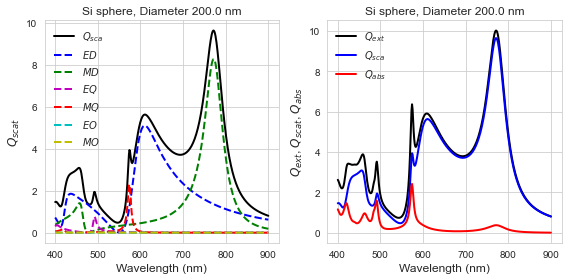

In [5]:
###########################################################################################
#======================= Function to calculate mie coefficients ===========================
###########################################################################################

def mie_coeff(n,x,z):
        
    # Calculating spherical bessel & henkel function for n and n-1 order
    jnx = spl.spherical_jn(n,x)
    jnx_1 = spl.spherical_jn(n-1,x)
    ynx = spl.spherical_yn(n,x)
    ynx_1 = spl.spherical_yn(n-1,x)
    jnz = spl.spherical_jn(n,z)
    jnz_1 = spl.spherical_jn(n-1,z)
    hnx = jnx+1j*ynx
    hnx_1 = jnx_1 + 1j*ynx_1

    # Recurrence Relationship to calculate derivative of product of spherical bessel function & x
    x_jnxp = x*jnx_1-n*jnx
    z_jnzp = z*jnz_1-n*jnz
    x_hnxp = x*hnx_1-n*hnx
    
    # Mie  scattering coefficients
    
    an = (mu*(m**2)*jnz*x_jnxp-mu1*jnx*z_jnzp)/(mu*(m**2)*jnz*x_hnxp-mu1*hnx*z_jnzp)
    bn = (mu1*jnz*x_jnxp-mu*jnx*z_jnzp)/(mu1*jnz*x_hnxp-mu*hnx*z_jnzp)
    
    return(an,bn)

##################################################################################################
#========================= Calculating cross sections for given particle =======================
##################################################################################################

Qsca = np.zeros(num_lam)
Qext = np.zeros(num_lam)
Csca = np.zeros(num_lam)
Cext = np.zeros(num_lam)        
                                                         
k=2*np.pi/(lam*1e-9)*n_medium
x=(k*a).astype(complex)                                             # Mie size parameter
#m=sqrt((eps1*mu1)/(eps*mu))                                         # Material parameter
m=n_sphere/n_medium
n_max=(np.round(2+max(x)+(4*max(x)**(1/3)))).astype(int)             # Truncation parameter
z=m*x  
    
for n in range(1,n_max+1):
    [an,bn] = mie_coeff(n,x,z)

    Csca = Csca + (2*np.pi/(k**2))*(((2*n+1)*(abs(an**2)))+((2*n+1)*(abs(bn**2))))
    Cext = Cext + ((2*np.pi/(k**2))*(2*n+1)*np.real(an+bn))
    
    Cgeom = np.pi*(a**2)
        
    Qsca = Csca/Cgeom
    Qext = Cext/Cgeom
    Qabs = Qext-Qsca

[an1,bn1]=mie_coeff(1,x,z)
[an2,bn2]=mie_coeff(2,x,z)
[an3,bn3]=mie_coeff(3,x,z)

# Electric dipole excitation coefficient
a1=(2/(x**2))*3*abs(an1**2) 
# Magnetic dipole excitation coefficient                                        
b1=(2/(x**2))*3*abs(bn1**2)

# Electric quadrupole excitation coefficient
a2=(2/(x**2))*5*abs(an2**2)
# Magnetic quadrupole excitation coefficient
b2=(2/(x**2))*5*abs(bn2**2)

# Electric octopole excitation coefficient
a3=(2/(x**2))*7*abs(an3**2)
# Magnetic octopole excitation coefficient
b3=(2/(x**2))*7*abs(bn3**2)

###############################################################################
#=================================== Plotting =================================
###############################################################################

fig1 = plt.figure(figsize=(8, 4))
fig1.subplots_adjust(left=0.15, bottom=0.15, right=0.85, top=0.95, wspace=0.3, hspace=0.35)

plt.subplot(121)
plt.plot(lam, Qsca, label=r'$Q_{sca}$', color='k', linestyle='-', marker='', markersize=6)    
plt.plot(lam, np.real(a1), label=r'$ED$', color='b', linestyle='--', marker='', markersize=6)
plt.plot(lam, np.real(b1), label=r'$MD$', color='g', linestyle='--', marker='', markersize=6)
plt.plot(lam, np.real(a2), label=r'$EQ$', color='m', linestyle='--', marker='', markersize=6)
plt.plot(lam, np.real(b2), label=r'$MQ$', color='r', linestyle='--', marker='', markersize=6)
plt.plot(lam, np.real(a3), label=r'$EO$', color='c', linestyle='--', marker='', markersize=6)
plt.plot(lam, np.real(b3), label=r'$MO$', color='y', linestyle='--', marker='', markersize=6)
    
plt.title(r'Si sphere, Diameter '+str(2*a*1e9)+' nm' )
plt.xlabel(r'Wavelength (nm)', fontsize=12)
plt.ylabel(r'$Q_{scat}$', fontsize=12)

plt.legend() 
legend=plt.legend()
frame = legend.get_frame()
frame.set_facecolor('1')
plt.legend(loc='best', fancybox=False, framealpha=0)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('x-large') 

plt.subplot(122)
plt.plot(lam, Qext, label=r'$Q_{ext}$', color='k', linestyle='-', marker='', markersize=6) 
plt.plot(lam, Qsca, label=r'$Q_{sca}$', color='b', linestyle='-', marker='', markersize=6) 
plt.plot(lam, Qabs, label=r'$Q_{abs}$', color='r', linestyle='-', marker='', markersize=6) 

    
plt.title(r'Si sphere, Diameter '+str(2*a*1e9)+' nm' )
plt.xlabel(r'Wavelength (nm)', fontsize=12)
plt.ylabel(r'$Q_{ext}$, $Q_{scat}$, $Q_{abs}$', fontsize=12)

plt.legend() 
legend=plt.legend()
frame = legend.get_frame()
frame.set_facecolor('1')
plt.legend(loc='best', fancybox=False, framealpha=0)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('x-large') 

plt.tight_layout()
